In [1]:
import numpy as np
from scipy import integrate as integ
from turing_model import TuringModel as tm
from matplotlib import pyplot as plt
from scipy import signal as signal
from tqdm import tqdm
from matplotlib.lines import Line2D
import random

0.5 0.5 0.0010140884080445346 0.5220068759602096 0.013054914898332727
5.1225923867184004 0.4774769179898521


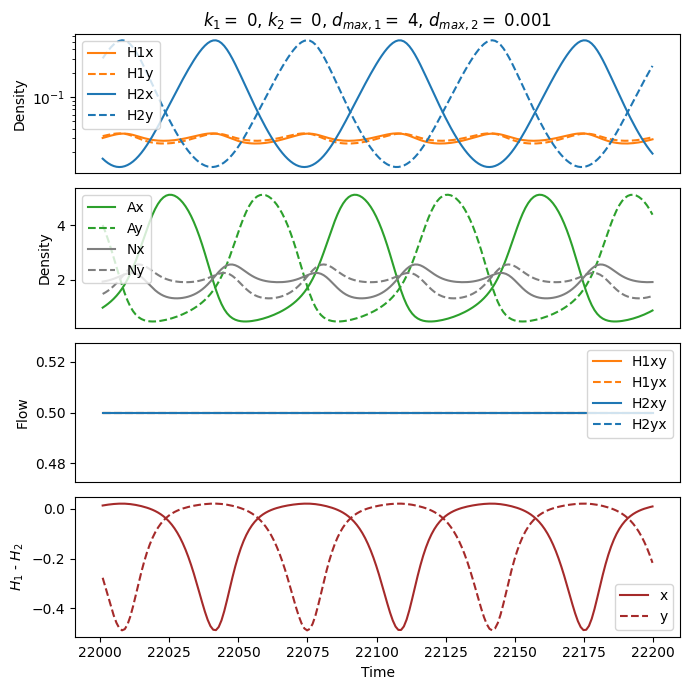

In [199]:
# fig, (ax1,ax2)=plt.subplots(2)
fig, (ax1,ax2,ax3, ax4)=plt.subplots(4, figsize=(7,7))
#fig, ax1=plt.subplots()
t_end = 2000
number_steps = 2000
t1 = np.linspace(0, t_end, number_steps)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# rndarr = np.linspace(0.1, 0.8, 100)
# var0 = [2, 2.5, 2.5, 2, random.choice(rndarr), random.choice(rndarr), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0, 0]
# var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 22000#24900#24920
end = 22200#25050#24985
var = []
k_1 = 0
k_2 = 0
d_Hmax1 = 4
d_Hmax2 = 10**-3
model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
t_end = 25050
number_steps = 25050
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
# var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], var[-1,4], var[-1,5], 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

## flow calcs
# inflection points
x_01 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
x_02 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
flowA_x = var[start:end, 2]
flowA_y = var[start:end, 3]
# dispersal rates of competitors
f_d_H1a = d_Hmax1 / (1 + np.exp(k_1 * (flowA_x - x_01)))
f_d_H1b = d_Hmax1 / (1 + np.exp(k_1 * (flowA_y - x_01)))
f_d_H2a = d_Hmax2 / (1 + np.exp(k_2 * (flowA_x - x_02)))
f_d_H2b = d_Hmax2 / (1 + np.exp(k_2 * (flowA_y - x_02)))
# flow rates
flow1xy = (f_d_H1a) / (f_d_H1a + f_d_H1b)
flow1yx = (f_d_H1b) / (f_d_H1a + f_d_H1b)
flow2xy = (f_d_H2a) / (f_d_H2a + f_d_H2b)
flow2yx = (f_d_H2b) / (f_d_H2a + f_d_H2b)

## fitness calcs
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]
F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]
F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))
F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

## plots
# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Density")
ax1.legend(loc="upper left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.get_xaxis().set_visible(False)
# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
# ax2.set_xlim(10005,10075)
ax2.legend(loc="upper left")
# ax3.plot(t[start:end], var[start:end, 4]-var[start:end, 6], label="x",color="brown")
# ax3.plot(t[start:end], var[start:end, 5]-var[start:end, 7], label="y",color="brown", linestyle="--")
ax3.plot(t[start:end], flow1xy, color="tab:orange", label="H1xy")
ax3.plot(t[start:end], flow1yx, color="tab:orange", linestyle="--", label="H1yx")
ax3.plot(t[start:end], flow2xy, color="tab:blue", label="H2xy")
ax3.plot(t[start:end], flow2yx, color="tab:blue", linestyle="--", label="H2yx")
# ax3.set_yscale("log")
ax3.get_xaxis().set_visible(False)
#ax3.set_ylabel("$H_1$ - $H_2$")
ax3.set_ylabel("Flow")
ax3.legend()
# ax4.plot(t[start:end], F1 - F2, label="F1-F2", color="tab:green")
# ax4.axhline(0, color="black", alpha=0.5, linestyle="--")
# ax4.set_xlabel("Time")
# ax4.set_ylabel("Fitness difference")
ax4.plot(t[start:end], var[start:end, 4]-var[start:end, 6], label="x",color="brown")
ax4.plot(t[start:end], var[start:end, 5]-var[start:end, 7], label="y",color="brown", linestyle="--")
ax4.set_xlabel("Time")
ax4.set_ylabel("$H_1$ - $H_2$")
ax4.legend()
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")
print(np.max(flow1xy), np.max(flow2xy), np.mean(F1-F2), np.max(var[start:end, 6]), np.min(var[start:end, 6]))
print(max(var[start:end,2]), min(var[start:end,2]))

Text(0, 0.5, 'F1-F2')

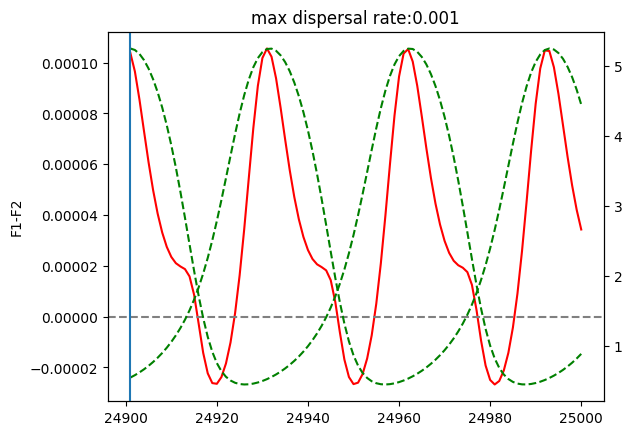

In [7]:
fig, ax = plt.subplots(1)
# ax.plot(t[start:end], f_d_H1a, color="tab:orange")
# ax.plot(t[start:end], f_d_H2a, color="tab:blue")
# ax.plot(t[start:end], f_d_H1b, color="tab:orange",  linestyle="--")
# ax.plot(t[start:end], f_d_H2b, color="tab:blue", linestyle="--")

ax1 = ax.twinx()
# ax1.plot(t[start:end], F1_gx, color="black")
# ax1.plot(t[start:end], F1_gy, color="black", linestyle="--")
# ax1.plot(t[start:end], F2_gx, color="black")
# ax1.plot(t[start:end], F2_gy, color="black", linestyle="--")
# ax1.plot(t[start:end], var[start:end, 2]+var[start:end,3], color="green")
ax1.plot(t[start:end], var[start:end, 2], color="green", linestyle="--")
ax1.plot(t[start:end], var[start:end, 3], color="green", linestyle="--")
maxpos = np.argmax(var[start:end, 2])
ax1.axvline(t[start+maxpos])
#ax2 = ax.twinx()
ax.plot(t[start:end], F1-F2, color="red")
ax.axhline(0, color="grey", linestyle="--")
plt.title("max dispersal rate:" + str(d_Hmax1))
ax.set_ylabel("F1-F2")

In [57]:
ax_low = var[start:end, 2]
ay_low = var[start:end, 3]
flow1xy_low = flow1xy
flow2xy_low = flow2xy
F1_low = F1
F2_low = F2
H1x_low = var[start:end, 4]
H2x_low = var[start:end, 6]
F1_gx_low = F1_gx
F2_gx_low = F2_gx

In [60]:
ax_mod = var[start:end, 2]
ay_mod = var[start:end, 3]
flow1xy_mod = flow1xy
flow2xy_mod = flow2xy
F1_mod = F1
F2_mod = F2
H1x_mod = var[start:end, 4]
H2x_mod = var[start:end, 6]
F1_gx_mod = F1_gx
F2_gx_mod = F2_gx

In [63]:
ax_hi = var[start:end, 2]
ay_hi = var[start:end, 3]
flow1xy_hi = flow1xy
flow2xy_hi = flow2xy
F1_hi = F1
F2_hi = F2
H1x_hi = var[start:end, 4]
H2x_hi = var[start:end, 6]
F1_gx_hi = F1_gx
F2_gx_hi = F2_gx

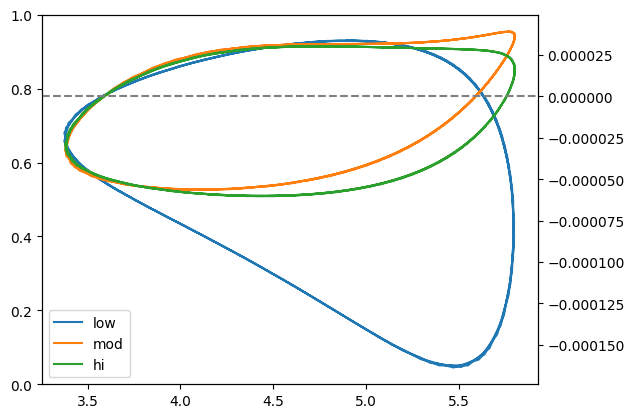

In [54]:
fig, ax = plt.subplots(1)
# ax.plot(ax_low+ay_low, F1_low)
# ax.plot(ax_mod+ay_mod, F1_mod)
# ax.plot(ax_hi+ay_hi, F1_hi)
ax1 = ax.twinx()
ax1.plot(ax_low+ay_low, F1_low-F2_low, label="low")
ax1.plot(ax_mod+ay_mod, F1_mod-F2_mod, label="mod")
ax1.plot(ax_hi+ay_hi, F1_hi-F2_hi, label="hi")
ax1.axhline(0, color="grey", linestyle="--")
ax1.legend()

Text(0.5, 1.0, 'max dispersal rate: 0.001; $k_2 = $ 0')

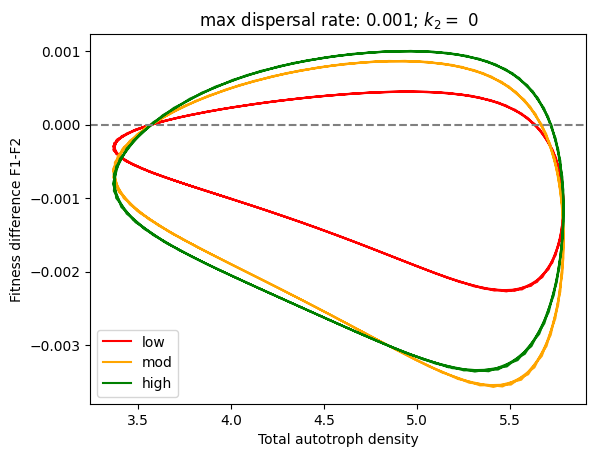

In [64]:
plt.axhline(0, color="grey", linestyle="--")
plt.plot(ax_low+ay_low, F1_low-F2_low, color="red", label="low")
plt.plot(ax_mod+ay_mod, F1_mod-F2_mod, color="orange", label="mod")
plt.plot(ax_hi+ay_hi, F1_hi-F2_hi, color="green", label="high")
plt.xlabel("Total autotroph density")
plt.ylabel("Fitness difference F1-F2")
plt.legend()
plt.title("max dispersal rate: " + str(d_Hmax1)+ "; $k_2 = $ " + str(k_2))

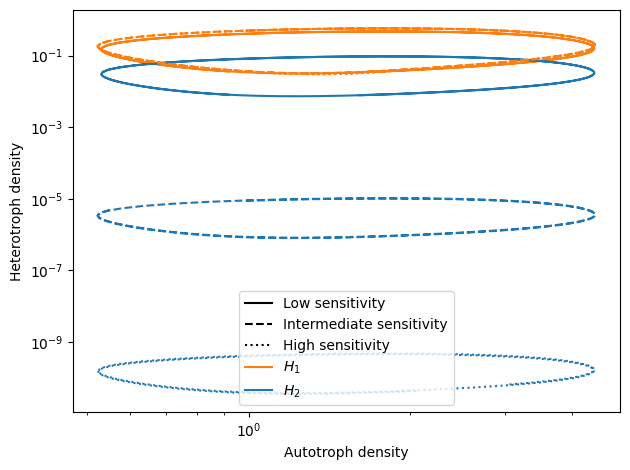

In [25]:
plt.plot(ax_low, H1x_low, color="tab:orange", label="H1 low $k$")
plt.plot(ax_low, H2x_low, color="tab:blue", label="H2 low $k$")
plt.plot(ax_mod, H1x_mod, color="tab:orange", label="H1xy", linestyle="--")
plt.plot(ax_mod, H2x_mod, color="tab:blue", label="H2xy", linestyle="--")
plt.plot(ax_hi, H1x_hi, color="tab:orange", label="H1xy", linestyle=":")
plt.plot(ax_hi, H2x_hi, color="tab:blue", label="H2xy", linestyle=":")
plt.xlabel("Autotroph density")
plt.ylabel("Heterotroph density")
plt.xscale("log")
plt.yscale("log")
# plt.title("Low: $k_S$ = 0.5, $k_I$ = 0.4; Moderate: $k_S$ = 1.3, $k_I$ = 1.2; High: $k_S$ = 2, $k_I$ = 1.9,\n $d_{max, H} = 10^{-3}$\n")

legend_elements = [
    Line2D([0], [0], linestyle='-', color='black', label='Low sensitivity'),
    Line2D([0], [0], linestyle='--', color='black', label='Intermediate sensitivity'),
    Line2D([0], [0], linestyle=':', color='black', label='High sensitivity'),
    Line2D([0], [0], linestyle='-', color='tab:orange', label='$H_1$'),
    Line2D([0], [0], linestyle='-', color='tab:blue', label='$H_2$')
]
plt.tight_layout()
plt.legend(handles=legend_elements)
plt.show()

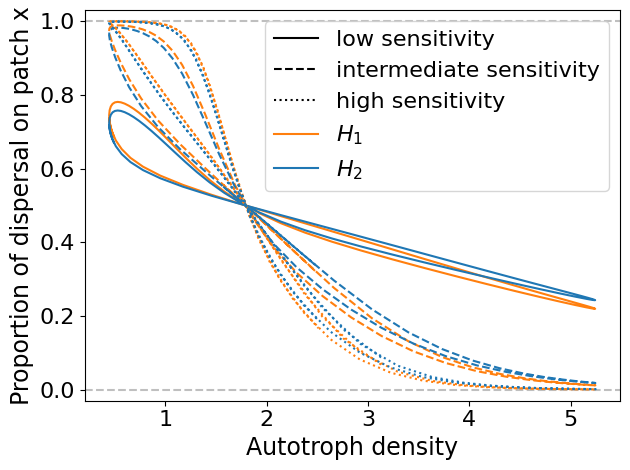

In [83]:
plt.axhline(1, color="grey", linestyle="--", alpha=0.5)
plt.axhline(0, color="grey", linestyle="--", alpha=0.5)
plt.plot(ax_low, flow1xy_low, color="tab:orange", label="H1 low $k$")
plt.plot(ax_low, flow2xy_low, color="tab:blue", label="H2 low $k$")
plt.plot(ax_mod, flow1xy_mod, color="tab:orange", label="H1xy", linestyle="--")
plt.plot(ax_mod, flow2xy_mod, color="tab:blue", label="H2xy", linestyle="--")
plt.plot(ax_hi, flow1xy_hi, color="tab:orange", label="H1xy", linestyle=":")
plt.plot(ax_hi, flow2xy_hi, color="tab:blue", label="H2xy", linestyle=":")
plt.xlabel("Autotroph density", fontsize=17)
plt.ylabel("Proportion of dispersal on patch x", fontsize=17)
plt.ylim(-0.03,1.03)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# plt.xscale("log")
# plt.title("Low: $k_S$ = 0.5, $k_I$ = 0.4; Moderate: $k_S$ = 1.3, $k_I$ = 1.2; High: $k_S$ = 2, $k_I$ = 1.9,\n $d_{max, H} = 10^{-3}$\n")

legend_elements = [
    Line2D([0], [0], linestyle='-', color='black', label='low sensitivity'),
    Line2D([0], [0], linestyle='--', color='black', label='intermediate sensitivity'),
    Line2D([0], [0], linestyle=':', color='black', label='high sensitivity'),
    Line2D([0], [0], linestyle='-', color='tab:orange', label='$H_1$'),
    Line2D([0], [0], linestyle='-', color='tab:blue', label='$H_2$')
]
plt.tight_layout()
plt.legend(handles=legend_elements, fontsize =16)
plt.show()

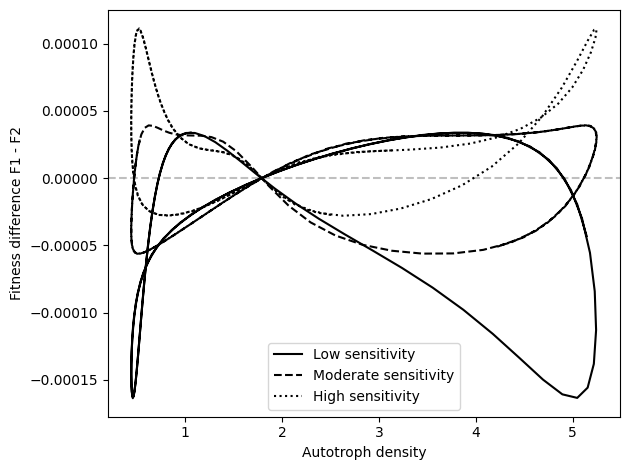

In [17]:
plt.axhline(0, color="grey", alpha=0.5, linestyle="--")
plt.plot(ax_low, F1_low - F2_low, color="black", label="H1 low $k$")
plt.plot(ax_mod, F1_mod - F2_mod, color="black", label="H1xy", linestyle="--")
plt.plot(ax_hi, F1_hi - F2_hi, color="black", label="H1xy", linestyle=":")
plt.xlabel("Autotroph density")
plt.ylabel("Fitness difference F1 - F2")

# plt.ylim(-0.03,1.03)
# plt.title("Low: $k_S$ = 0.5, $k_I$ = 0.4; Moderate: $k_S$ = 1.3, $k_I$ = 1.2; High: $k_S$ = 2, $k_I$ = 1.9,\n $d_{max, H} = 10^{-3}$\n")

legend_elements = [
    Line2D([0], [0], linestyle='-', color='black', label='Low sensitivity'),
    Line2D([0], [0], linestyle='--', color='black', label='Moderate sensitivity'),
    Line2D([0], [0], linestyle=':', color='black', label='High sensitivity')
]
plt.tight_layout()
plt.legend(handles=legend_elements)
plt.show()

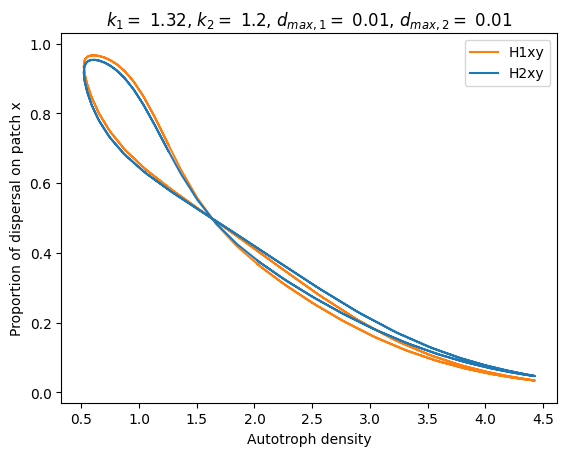

In [4]:
plt.plot(var[start:end,2], flow1xy, color="tab:orange", label="H1xy")
plt.plot(var[start:end,2], flow2xy, color="tab:blue", label="H2xy")
plt.xlabel("Autotroph density")
plt.ylabel("Proportion of dispersal on patch x")
plt.legend()
plt.ylim(-0.03,1.03)
plt.title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
plt.show()

In [87]:
# inflection points
x_01 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
x_02 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
flowA_x = var[start:end, 2]
flowA_y = var[start:end, 3]


# dispersal rates of competitors
f_d_H1a = d_Hmax1 / (1 + np.exp(k_1 * (flowA_x - x_01)))
f_d_H1b = d_Hmax1 / (1 + np.exp(k_1 * (flowA_y - x_01)))
f_d_H2a = d_Hmax2 / (1 + np.exp(k_2 * (flowA_x - x_02)))
f_d_H2b = d_Hmax2 / (1 + np.exp(k_2 * (flowA_y - x_02)))

flow1xy = (f_d_H1a) / (f_d_H1a + f_d_H1b)
flow1yx = (f_d_H1b) / (f_d_H1a + f_d_H1b)
flow2xy = (f_d_H2a) / (f_d_H2a + f_d_H2b)
flow2yx = (f_d_H2b) / (f_d_H2a + f_d_H2b)

In [60]:
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]

F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]

F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))
# np.mean(F1-F2

In [37]:
np.argmin(var[start:end, 4])

55

In [52]:
len(var[start:end, 4])

150

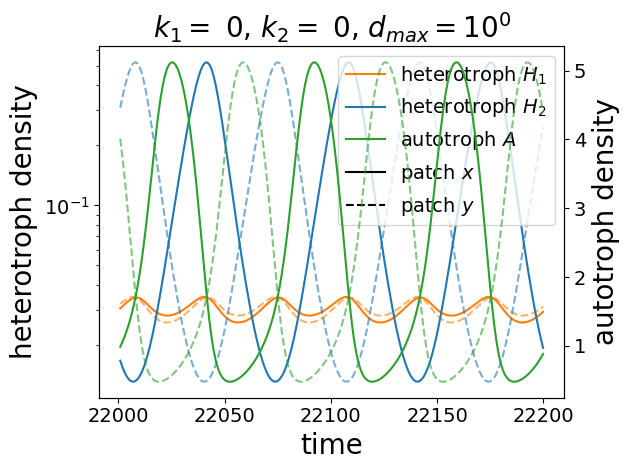

In [201]:
fig, (ax1)=plt.subplots(1)
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--", alpha = 0.6)
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--", alpha = 0.6)
ax1.set_yscale("log")
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max} = 10^{0}$", fontsize=20)
#ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
# plot F1-F2 on second y axis
# ax2 = ax1.twinx()
# thicker than the other lines
# ax2.plot(t[start:end], F1 - F2, label="F1-F2", color="tab:green", linewidth=2)
# ax2.set_ylabel("F1-F2")
# twin ax1 
ax2 = ax1.twinx()
# ax2.plot(t[start:end], var[start:end, 0], label="$N_x$", color="tab:gray")
# ax2.plot(t[start:end], var[start:end, 1], label="$N_y$", color="tab:gray", linestyle="--", alpha = 0.6)
ax2.plot(t[start:end], var[start:end, 2], label="$A_x$", color="tab:green")
ax2.plot(t[start:end], var[start:end, 3], label="$A_y$", color="tab:green", linestyle="--", alpha = 0.6)
ax2.set_ylabel("autotroph density", fontsize=20)
# ax2.set_ylim(-0.075, 0.075)
# ax2.set_ylim(-0.06, 0.06)
# line at y = 0
# ax2.axhline(0, color="black", alpha=0.5, linestyle="--")
ax1.set_xlabel("time", fontsize=20)
ax1.set_ylabel("heterotroph density", fontsize=20)
# remove ax1 ticklabels
# ax1.set_xticklabels([])

# line2d legend
legend_elements = [
    Line2D([0], [0], linestyle='-', color='tab:orange', label='heterotroph $H_1$'),
    Line2D([0], [0], linestyle='-', color='tab:blue', label='heterotroph $H_2$'),
    Line2D([0], [0], linestyle='-', color='tab:green', label='autotroph $A$'),
    # Line2D([0], [0], linestyle='-', color='gray', label='$N$'),
    Line2D([0], [0], linestyle='-', color='black', label='patch $x$'),
    Line2D([0], [0], linestyle='--', color='black', label='patch $y$')
]

ax1.legend(handles=legend_elements, bbox_transform=plt.gcf().transFigure, fontsize=14)

# increase ticklabel size 
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
# ax1.axvline(t[start:end][np.argmin(var[start:end, 4])], color="tab:orange", linestyle="--")
# ax1.axvline(t[start:end][np.argmin(var[start:end, 6])], color="tab:blue", linestyle="--")
# ax1.axvline(t[24960:25000][np.argmin(var[24960:25000, 4])], color="tab:orange", linestyle="--")

# ax1.scatter((t[24960:25000][np.argmin(var[24960:25000, 4])]), -0.01, color="tab:orange, marker="^")
# ax1.scatter((t[start:end][np.argmin(var[start:end, 6])]), -0.01, color="tab:blue", marker="^")
plt.tight_layout()	
plt.show()

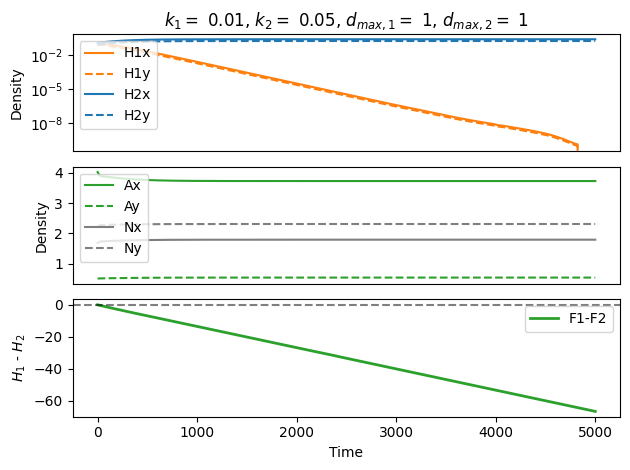

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(3)
# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Density")
ax1.legend(loc="upper left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.get_xaxis().set_visible(False)
# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
# ax2.set_xlim(10005,10075)
ax2.legend(loc="upper left")
ax3.plot(t[start:end], F1 - F2, label="F1-F2", color="tab:green", linewidth=2)
ax3.axhline(0, color="black", alpha=0.5, linestyle="--")
ax3.set_xlabel("Time")
ax3.set_ylabel("$H_1$ - $H_2$")
ax3.legend()
# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

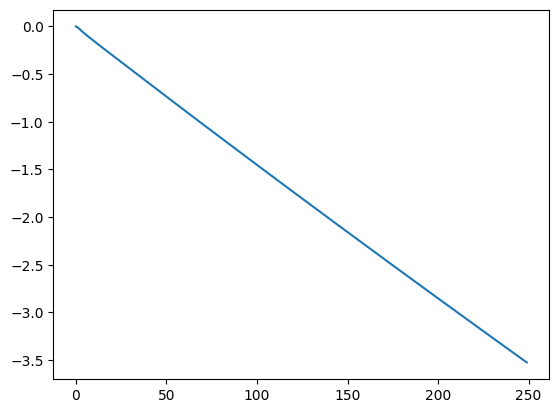

In [30]:
plt.plot(t[start:end], F1-F2)

In [4]:
def find_extrema(x,n):
    """ returns an array with n extreme values of x"""
    
    min_index = signal.argrelmin(x)[0]         # create array with indices of local minima of x
    max_index = signal.argrelmax(x)[0]         # create array with indices of local maxima of x
    
    ext_index = np.append(min_index,max_index) # array with indices of local extrema in x
    ext_index = np.sort(ext_index)             # sort array (alternating minima and maxima)
    extrema = x[ext_index]                     # array with the actual values of the extrema
       
    if len(extrema) == 0:                      # if all values in x are the same and no extremum is found:
        extrema = np.append(extrema,x[-1])     #   return last value of x in this case
    while len(extrema) < n:                    # if less than n extrema have been found:
        extrema = np.append(extrema,extrema[0])#   repeat last extremum until array has n elements
    while len(extrema) > n:                    # if more than n extrema have been found:
        extrema = np.delete(extrema,-1)        #   delete elements until arrays has n elements
        
    return extrema

In [118]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1_range = np.geomspace(0.1, 10, 100)
k_2 = 0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

Fdiff = []
F1mean = []
F2mean = []

var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 10000
    number_steps = 10000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    F1_H1x = var[start:end, 4]
    F1_H1y = var[start:end, 5]

    F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
    F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
    F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
    F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

    F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

    F2_H2x = var[start:end, 6]
    F2_H2y = var[start:end, 7]

    F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

    Fdiff.append(find_extrema((F1-F2), num_extr))

    F1mean.append(np.mean(F1))
    F2mean.append(np.mean(F2))


    i += 1

100%|██████████| 100/100 [03:29<00:00,  2.10s/it]


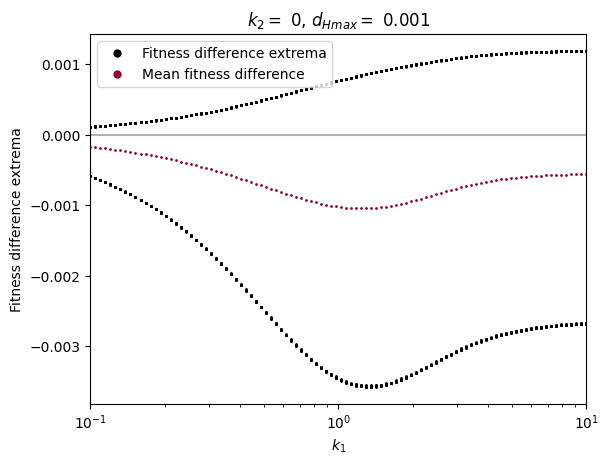

In [119]:
plt.plot(k_1_range, Fdiff, ".", markersize=2, color = "black")
plt.plot(k_1_range, np.array(F1mean) - np.array(F2mean), ".", markersize=2, color = "#990033")
plt.xscale("log")
plt.xlabel("$k_1$")
plt.ylabel("Fitness difference extrema")    
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
# plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
# plt.axvspan(0, 0.38, alpha=0.2, color='tab:orange')
# plt.axvspan(0.38, 10, alpha=0.2, color='tab:blue')
#plt.fill_betweenx([-0.002, 0.003], 0.38, 0.62, alpha=0.2, color='tab:blue', hatch='//', edgecolor="none")
plt.xlim(10**-1, 10**1)
# plt.ylim(-0.002, 0.003)
# plt.ylim(-0.003, 0.003)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Fitness difference extrema', markerfacecolor='black', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Mean fitness difference', markerfacecolor='#990033', markersize=7),
]
plt.legend(handles=legend_elements)


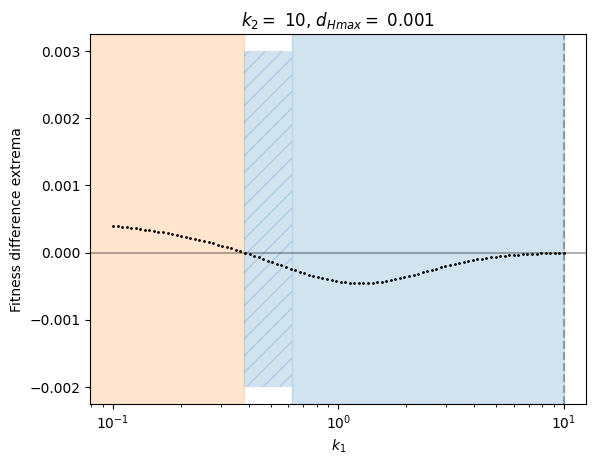

In [206]:
# plt.plot(k_1_range, F1mean, ".", markersize=2, color = "tab:orange")
# plt.plot(k_1_range, F2mean, ".", markersize=2, color = "tab:blue")
# plt.plot(k_1_range, F1mean - F2mean, ".", markersize=2, color = "black")
plt.plot(k_1_range, np.array(F1mean) - np.array(F2mean), ".", markersize=2, color = "black")
plt.xscale("log")
plt.xlabel("$k_1$")
plt.ylabel("Fitness difference extrema")    
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
plt.axvspan(0, 0.38, alpha=0.2, color='tab:orange')
plt.axvspan(0.62, 10, alpha=0.2, color='tab:blue')
plt.fill_betweenx([-0.002, 0.003], 0.38, 0.62, alpha=0.2, color='tab:blue', hatch='//', edgecolor="none")
# plt.xlim(10**-1, 10**1)
# plt.ylim(-0.00075, 0.00075)

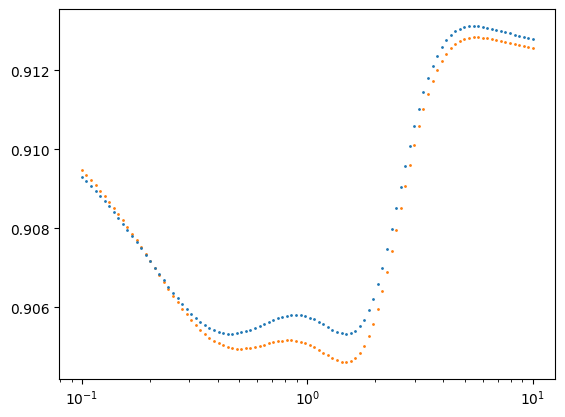

In [140]:
plt.plot(k_1_range, np.array(F1mean), ".", markersize=2, color = "tab:orange")
plt.plot(k_1_range, np.array(F2mean), ".", markersize=2, color = "tab:blue")
plt.xscale("log")

In [ ]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1_range = np.geomspace(0.369,0.372, 100)
k_2 = 10**1
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

Fdiff = []


var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 10000
    number_steps = 10000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    F1_gx = var[start:end, 12]
    F1_gy = var[start:end, 13]
    F1_H1x = var[start:end, 4]
    F1_H1y = var[start:end, 5]

    F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

    F2_gx = var[start:end, 14]
    F2_gy = var[start:end, 15]
    F2_H2x = var[start:end, 6]
    F2_H2y = var[start:end, 7]

    F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

    Fdiff.append(find_extrema((F1-F2), num_extr))

    i += 1

In [138]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 17500#195000#24850
end = 20000#0#25000

var = []
k_1_range = np.geomspace(1, 100, 25)
k_2 = 10**0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

H1x_extr = []
H1y_extr = []
H2x_extr = []
H2y_extr = []


var = []

i = 0

for k_1 in tqdm(k_1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 20000#0
    number_steps = 20000#0
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    H1x_extr.append(find_extrema((var[start:end,4]),num_extr))
    H1y_extr.append(find_extrema((var[start:end,5]),num_extr))
    H2x_extr.append(find_extrema((var[start:end,6]),num_extr))
    H2y_extr.append(find_extrema((var[start:end,7]),num_extr))


    i += 1

100%|██████████| 25/25 [01:37<00:00,  3.90s/it]


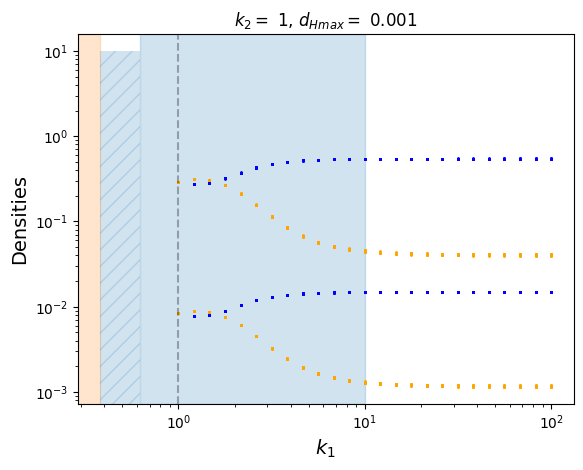

In [140]:
plt.plot(k_1_range, H1x_extr, ".", markersize=2, color = "blue")
plt.plot(k_1_range, H1y_extr, ".", markersize=2, color = "blue")
plt.plot(k_1_range, H2x_extr, ".", markersize=2, color = "orange")
plt.plot(k_1_range, H2y_extr, ".", markersize=2, color = "orange")
plt.xscale("log")
plt.xlabel("$k_1$", fontsize=14)
plt.ylabel("Densities", fontsize=14) 
plt.title("$k_2 = $ " + str(k_2) + ", $d_{Hmax} = $ " + str(d_Hmax1))
plt.axvline(k_2, color="black", linestyle="--", alpha=0.3)
plt.axhline(0, color="black", linestyle="-", alpha=0.3)
plt.axvspan(0, 0.38, alpha=0.2, color='tab:orange')
plt.axvspan(0.62, 10, alpha=0.2, color='tab:blue')
# plt.xlim(10**-1, 10**1)
plt.fill_betweenx([0, 10**1], 0.38, 0.62, alpha=0.2, color='tab:blue', hatch='//', edgecolor="none")
# plt.ylim(10**-6, 1)
plt.yscale("log")

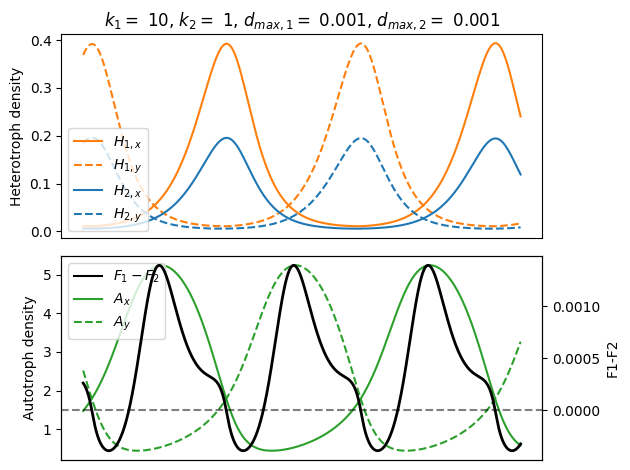

In [37]:
# fig, (ax1,ax2)=plt.subplots(2)
fig, (ax1, ax2)=plt.subplots(2)
#fig, ax1=plt.subplots()
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 49000#49875#24850
end = 50000#49975
var = []
k_1 = 10**1
k_2 = 10**0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
t_end = 5000
number_steps = 50000
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

# F1_gx = var[start:end, 12]
# F1_gy = var[start:end, 13]
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]

F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

# F2_gx = var[start:end, 14]
# F2_gy = var[start:end, 15]
F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]

F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))
# np.mean(F1-F2

# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="$H_{1,x}$",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="$H_{1,y}$",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="$H_{2,x}$",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="$H_{2,y}$",color="tab:blue", linestyle="--")
# ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Heterotroph density")
ax1.legend(loc="lower left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:start+1], var[start:start+1, 2], label="$F_1 - F_2$",color="black")
ax2.plot(t[start:end], var[start:end:, 2], label="$A_x$",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="$A_y$",color="tab:green", linestyle="--")

ax2.get_xaxis().set_visible(False)



# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])

ax2.set_xlabel("Time")
ax2.set_ylabel("Autotroph density")
# ax2.set_xlim(10005,10075)
ax3 = ax2.twinx()
ax3.plot(t[start:end], F1 - F2, label="F1 - F2", color="black", linewidth=2)
ax3.set_ylabel("F1-F2")
# ax2.set_ylim(-0.075, 0.075)
# ax2.set_ylim(-0.06, 0.06)
# line at y = 0
ax3.axhline(0, color="black", alpha=0.5, linestyle="--")

start_point = (4933, 0)
end_point = (4933, 0.018)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

start_point = (4963.5, 0)
end_point = (4963.5, 0.009)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

ax2.legend(loc="upper left")


# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

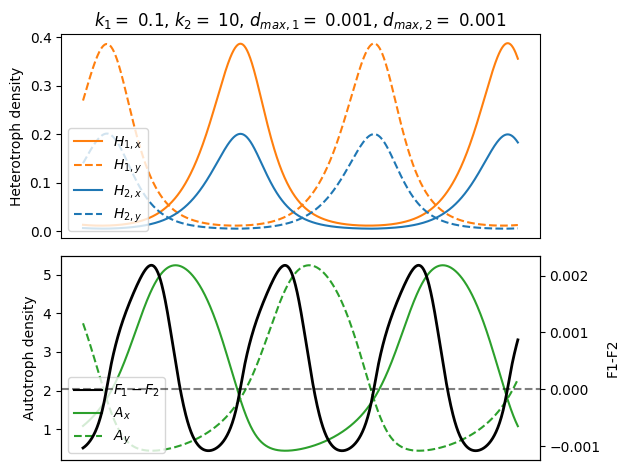

In [29]:
# fig, (ax1,ax2)=plt.subplots(2)
fig, (ax1, ax2)=plt.subplots(2)
#fig, ax1=plt.subplots()
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 49000#49875#24850
end = 50000#49975
var = []
k_1 = 10**-1
k_2 = 10**1
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
t_end = 5000
number_steps = 50000
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

# F1_gx = var[start:end, 12]
# F1_gy = var[start:end, 13]
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]

F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

# F2_gx = var[start:end, 14]
# F2_gy = var[start:end, 15]
F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]

F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))
# np.mean(F1-F2

# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="$H_{1,x}$",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="$H_{1,y}$",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="$H_{2,x}$",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="$H_{2,y}$",color="tab:blue", linestyle="--")
# ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Heterotroph density")
ax1.legend(loc="lower left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:start+1], var[start:start+1, 2], label="$F_1 - F_2$",color="black")
ax2.plot(t[start:end], var[start:end:, 2], label="$A_x$",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="$A_y$",color="tab:green", linestyle="--")

ax2.get_xaxis().set_visible(False)



# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])

ax2.set_xlabel("Time")
ax2.set_ylabel("Autotroph density")
# ax2.set_xlim(10005,10075)
ax3 = ax2.twinx()
ax3.plot(t[start:end], F1 - F2, label="F1 - F2", color="black", linewidth=2)
ax3.set_ylabel("F1-F2")
# ax2.set_ylim(-0.075, 0.075)
# ax2.set_ylim(-0.06, 0.06)
# line at y = 0
ax3.axhline(0, color="black", alpha=0.5, linestyle="--")

start_point = (4936.3, 0)
end_point = (4936.3, -0.0525)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

start_point = (4967, 0)
end_point = (4967, -0.0075)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

ax2.legend(loc="lower left")


# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

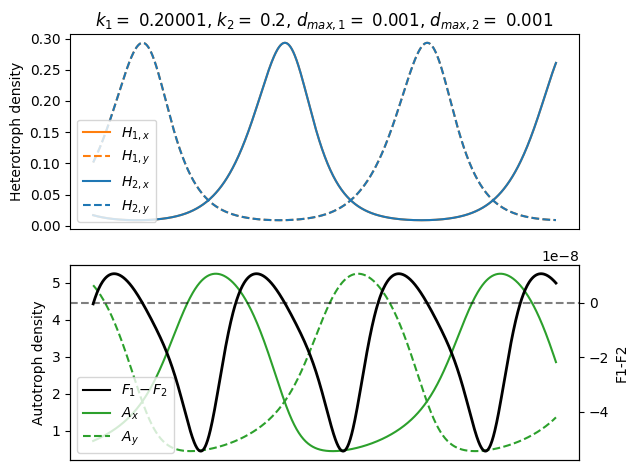

In [36]:
# fig, (ax1,ax2)=plt.subplots(2)
fig, (ax1, ax2)=plt.subplots(2)
#fig, ax1=plt.subplots()
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.30, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0, 0, 0]
start = 49000#49875#24850
end = 50000#49975
var = []
k_1 = 0.20001
k_2 = 0.2
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
t_end = 5000
number_steps = 50000
t = np.linspace(0, t_end, number_steps)
var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

# F1_gx = var[start:end, 12]
# F1_gy = var[start:end, 13]
F1_H1x = var[start:end, 4]
F1_H1y = var[start:end, 5]

F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

# F2_gx = var[start:end, 14]
# F2_gy = var[start:end, 15]
F2_H2x = var[start:end, 6]
F2_H2y = var[start:end, 7]

F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))


# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="$H_{1,x}$",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="$H_{1,y}$",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="$H_{2,x}$",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="$H_{2,y}$",color="tab:blue", linestyle="--")
# ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
ax1.set_title("$k_1 = $ " + str(k_1) + ", $k_2 = $ " + str(k_2) + ", $d_{max, 1} = $ " + str(d_Hmax1)+ ", $d_{max, 2} = $ " + str(d_Hmax2))
ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Heterotroph density")
ax1.legend(loc="lower left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:start+1], var[start:start+1, 2], label="$F_1 - F_2$",color="black")
ax2.plot(t[start:end], var[start:end:, 2], label="$A_x$",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="$A_y$",color="tab:green", linestyle="--")

ax2.get_xaxis().set_visible(False)



# ax2.get_yaxis().set_visible(False)
# ax2.get_xaxis().set_ticks([])
# ax2.get_yaxis().set_ticks([])

ax2.set_xlabel("Time")
ax2.set_ylabel("Autotroph density")
# ax2.set_xlim(10005,10075)
ax3 = ax2.twinx()
ax3.plot(t[start:end], F1 - F2, label="F1 - F2", color="black", linewidth=2)
ax3.set_ylabel("F1-F2")
# ax2.set_ylim(-0.075, 0.075)
# ax2.set_ylim(-0.06, 0.06)
# line at y = 0
ax3.axhline(0, color="black", alpha=0.5, linestyle="--")

start_point = (4936.3, 0)
end_point = (4936.3, -0.0525)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

start_point = (4967, 0)
end_point = (4967, -0.0075)
arrow_color = 'red'
ax3.annotate('', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color=arrow_color))

ax2.legend(loc="lower left")


# ax3.set_yscale("log")
plt.tight_layout()
#plt.savefig("output/kforsmalldmax/transition3.png")

In [240]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1_range = np.geomspace(0.1, 10, 25)
k_2_range = np.geomspace(0.1, 10, 25)
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3


num_extr = 12 # set number of maxima to be found

Fdiff = np.zeros((len(k_1_range), len(k_2_range)))
F1mean = np.zeros((len(k_1_range), len(k_2_range)))
F2mean = np.zeros((len(k_1_range), len(k_2_range)))

var = []

i = 0
j = 0
for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in tqdm(k_1_range):
        #k_2 = k_1
        model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
        t_end = 10000
        number_steps = 10000
        t = np.linspace(0, t_end, number_steps)
        var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
        model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

        F1_H1x = var[start:end, 4]
        F1_H1y = var[start:end, 5]

        F1_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
        F1_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])
        F2_gx = (1 * var[start:end, 2]) / (1 + 1 * 0.53 * var[start:end, 2])
        F2_gy = (1 * var[start:end, 3]) / (1 + 1 * 0.53 * var[start:end, 3])

        F1 = F1_gx * (F1_H1x/(F1_H1x+F1_H1y)) + F1_gy * (F1_H1y/(F1_H1x+F1_H1y))

        F2_H2x = var[start:end, 6]
        F2_H2y = var[start:end, 7]

        F2 = F2_gx * (F2_H2x/(F2_H2x+F2_H2y)) + F2_gy * (F2_H2y/(F2_H2x+F2_H2y))

        F1mean[i,j] = np.mean(F1)
        F2mean[i,j] = np.mean(F2)

        j += 1
    i += 1

100%|██████████| 25/25 [22:02<00:00, 52.91s/it]


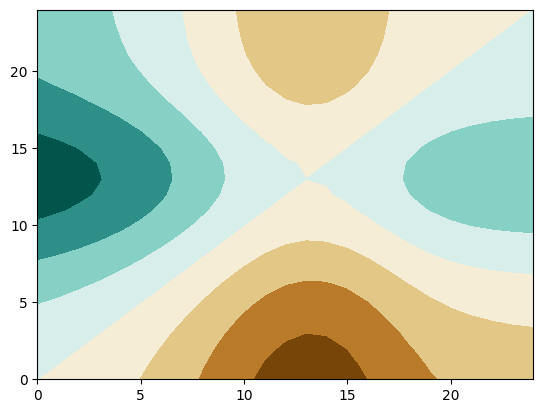

In [248]:
plt.contourf(F1mean-F2mean, cmap="BrBG")

In [5]:
# fitness difference as bifurcation parameter over k_1 and fixed k_2 
# k_2 in a region where it can either win or lose -> 10**1
t_end = 5000
number_steps = 5000
t1 = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 9000#24850
end = 10000#25000

var = []
k_1 = 0
k_2 = 0
d_Hmax1 = 10**-1
d_Hmax2 = 10**-2
d_Hmax1_range = np.geomspace(10**-1, 10**1, 25)

H1x_extr = []
H1y_extr = []
H2x_extr = []
H2y_extr = []

num_extr = 12 # set number of maxima to be found

var = []

i = 0

for d_Hmax1 in tqdm(d_Hmax1_range):
    #k_2 = k_1
    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 10000
    number_steps = 10000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    H1x_extr.append(find_extrema((var[-500:-1,4]),num_extr))
    H1y_extr.append(find_extrema((var[-500:-1,5]),num_extr))
    H2x_extr.append(find_extrema((var[-500:-1,6]),num_extr))
    H2y_extr.append(find_extrema((var[-500:-1,7]),num_extr))


    i += 1

 36%|███▌      | 9/25 [00:00<00:00, 23.03it/s]c:\Python312\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
100%|██████████| 25/25 [00:23<00:00,  1.08it/s]


In [158]:
d_Hmax1_range = np.linspace(4*10**0, 6*10**0, 25)


var = []
xlen = np.linspace(0, 500, 500)
H1x = np.zeros((len(xlen),len(d_Hmax1_range)))
H1y = np.zeros((len(xlen),len(d_Hmax1_range)))
H2x = np.zeros((len(xlen),len(d_Hmax1_range)))
H2y = np.zeros((len(xlen),len(d_Hmax1_range)))

k_1 = 0
k_2 = 0
d_Hmax1 = 10**1
d_Hmax2 = 10**-3

start = 49500
end = 50000

i = 0

for d_Hmax1 in tqdm(d_Hmax1_range):
    t_end = 5000
    number_steps = 5000
    t1 = np.linspace(0, t_end, number_steps)

    var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    var = []

    model = tm(var0, t1, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t1, args=(model,))
    t_end = 50000
    number_steps = 50000
    t = np.linspace(0, t_end, number_steps)
    var00 = [var[-1,0], var[-1,1], var[-1,2], var[-1,3], 0.5*var[-1,4], 0.5*var[-1,5], 0.5*var[-1,4], 0.5*var[-1,5], 0, 0, 0, 0, 0, 0, 0, 0]
    model = tm(var00, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var00, t, args=(model,))

    H1x[:,i] = var[start:end,4]
    H1y[:,i] = var[start:end,5]
    H2x[:,i] = var[start:end,6]
    H2y[:,i] = var[start:end,7]

    i += 1


100%|██████████| 25/25 [03:19<00:00,  7.96s/it]


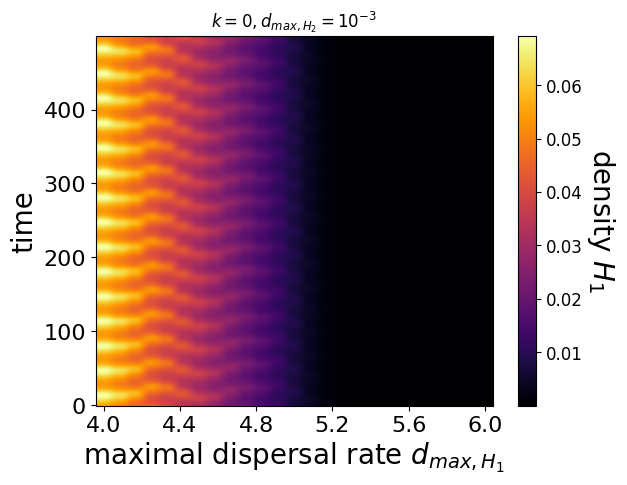

In [190]:
H1xtemp = H1x
# H1xtemp[H1xtemp < 10**-6] = 0
H1ytemp = H1y
# H1ytemp[H1ytemp < 10**-6] = 0
Htotal = H1xtemp+H1ytemp
# Htotal[Htotal < 2*10**-6] = 0
im,ax = plt.subplots(1)
im = ax.imshow((Htotal), cmap='inferno', aspect='auto', origin="lower")#, vmax=np.log(0.2), vmin=np.log(10**-6))
cbar = plt.colorbar(im)
cbar.set_label("density $H_1$", rotation=270, labelpad=25, fontsize=20)
cbar.ax.tick_params(labelsize=12)
ax.set_xlabel("maximal dispersal rate $d_{max, H_1}$", fontsize=20)
ax.set_ylabel("time", fontsize=20)
ax.set_xticks(np.linspace(0, 24, 6))
ax.set_xticklabels(np.linspace(4,6,6), fontsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.title("$k = 0, d_{max,H_2} = 10^{-3}$")
# plt.tight_layout()
# mask areas where Htotal < 10**-6
import numpy.ma as ma
# mask = ma.masked_where(H1xtemp >10**-6, H1xtemp)
# plt.contourf(mask, hatches=['///'], colors='none')

plt.show()

In [126]:
np.log(10**-6)

-13.815510557964274

In [10]:

plt.plot(d_Hmax1_range,H1xtemp[1,:])
plt.plot(d_Hmax1_range,H1xtemp[2,:])
plt.plot(d_Hmax1_range,H1xtemp[3,:])
plt.plot(d_Hmax1_range,H1xtemp[4,:])
plt.plot(d_Hmax1_range,H1xtemp[5,:])
plt.plot(d_Hmax1_range,H1xtemp[6,:])
plt.plot(d_Hmax1_range,H1xtemp[7,:])
plt.plot(d_Hmax1_range,H1xtemp[8,:])
plt.plot(d_Hmax1_range,H1xtemp[9,:])
plt.plot(d_Hmax1_range,H1xtemp[10,:])
plt.plot(d_Hmax1_range,H1xtemp[11,:])
plt.yscale("log")
plt.xlabel("$d_{max, H_1}$")
plt.ylabel("Density $H_1$")

NameError: name 'H1xtemp' is not defined